In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from pathlib import Path

In [2]:
fiji = pd.read_csv('./data/Fiji.csv')

In [3]:
rgdp_fiji = fiji['RGDP_FIJI'][0:44]
rgdp_aus = fiji['RGDP_AUS'][0:44]

In [13]:
#  https://www.statology.org/cross-correlation-in-python/ 

from statsmodels.tsa import stattools

xcorr = stattools.ccf(rgdp_fiji, rgdp_aus,adjusted=False)
xcorr[:11]

array([0.98702034, 0.90941425, 0.83315278, 0.76136389, 0.69495878,
       0.62902916, 0.55947881, 0.48986774, 0.42075244, 0.35182917,
       0.29028678])

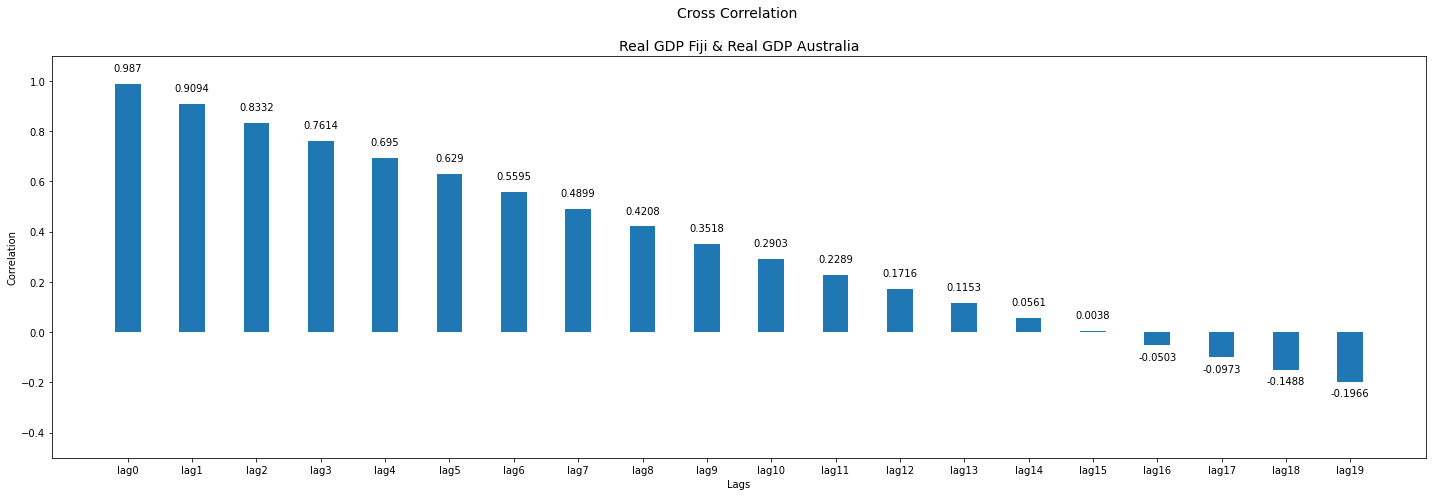

In [16]:
fig, ax = plt.subplots(figsize=(20, 7))

x_vals = []

for i in range(20):
    x_vals.append('lag'+ str(i))

x = x_vals
y = xcorr[:20]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation')
ax.set_ylim(-0.5, 1.1)
ax.set_title('Cross Correlation \n\nReal GDP Fiji & Real GDP Australia', fontsize=14)

for index, value in enumerate(y):
    if value >= 0:
        plt.text(x=index, y=value + 0.05, s=str(round(value,4)), ha='center')
    else:
        plt.text(x=index, y=value - 0.06, s=str(round(value,4)), ha='center')

plt.tight_layout()

In [544]:
fiji.head()

,Date,RGDP_FIJI,G_REAL_GROWTH_FIJI,RGDP_AUS,G_REAL_GROWTH_AUS,REER_FIJI,SUGAROUTPUT_FIJI,G_SUGAR_OUTPUT,SUGAROUTPUT_FIJI_MISSING,constant,RGDP_AUS_LOG,RGDP_FIJI_LOG,SUGAROUTPUT_FIJI_LOG,recession,RGDP_FIJI_LAG_LOG,RGDP_AUS_LAG_LOG
Date,,,,,,,,,,,,,,,,
1970,1970,1.6316,NaN,406.2,NaN,NaN,NaN,NaN,NaN,1,6.006846,0.489561,NaN,0,0.555952,6.044294
1971,1971,1.7436,6.864428,421.7,3.815854,NaN,NaN,NaN,NaN,1,6.044294,0.555952,NaN,0,0.628289,6.063087
1972,1972,1.8744,7.501721,429.7,1.897083,NaN,NaN,NaN,NaN,1,6.063087,0.628289,NaN,0,0.738168,6.112354
1973,1973,2.0921,11.614383,451.4,5.050035,NaN,NaN,NaN,NaN,1,6.112354,0.738168,NaN,0,0.763279,6.126869
1974,1974,2.1453,2.542899,458.0,1.462118,NaN,NaN,NaN,NaN,1,6.126869,0.763279,NaN,0,0.762767,6.145472


In [761]:
import statsmodels.api as sm

fiji = pd.read_csv('./data/Fiji.csv')
fiji['constant'] = 1
fiji['RGDP_AUS_LOG'] = np.log(fiji['RGDP_AUS'])
fiji['RGDP_FIJI_LOG'] = np.log(fiji['RGDP_FIJI'])
fiji['SUGAROUTPUT_FIJI_LOG'] = np.log(fiji['SUGAROUTPUT_FIJI'])
fiji['recession'] = [1 if i in [2007, 2008, 2009, 2010] else 0 for i in fiji['Date']]
fiji['RGDP_FIJI_LAG_LOG'] = np.log(fiji['RGDP_FIJI'].shift(1))
fiji['RGDP_AUS_LAG_LOG'] = np.log(fiji['RGDP_AUS'].shift(1))
fiji.index = fiji['Date']

exog = ['constant','RGDP_AUS_LOG', 'SUGAROUTPUT_FIJI_LOG', 'recession','RGDP_FIJI_LAG_LOG', 'RGDP_AUS_LAG_LOG']

### train on: 1990-2011

In [763]:
results = sm.OLS(endog=fiji.loc[1990:2011]['RGDP_FIJI_LOG'], 
                 exog=fiji.loc[1990:2011][exog], 
                 missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RGDP_FIJI_LOG   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.15e-16
Time:                        17:29:16   Log-Likelihood:                 64.276
No. Observations:                  22   AIC:                            -116.6
Df Residuals:                      16   BIC:                            -110.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                -4.2238      0.657     -6.425      0.000      -5.617      -2.830
RGDP_AUS_LOG             1.4471      0.284      5.090      0.000       0.844       2.050
SUGAROUTPUT_FIJI_LOG     0.0822      0.022      3.701      0.002       0.035       0.129
recession               -0.0207      0.011     -1.839      0.085      -0.045       0.003
RGDP_FIJI_LAG_LOG        0.1196      0.132      0.906      0.378      -0.160       0.399
RGDP_AUS_LAG_LOG        -0.7611      0.266     -2.860      0.011      -1.325      -0.197
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.093
Skew:                           0.148   Prob(JB):                        0.579
Kurtosis:                       1.949   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

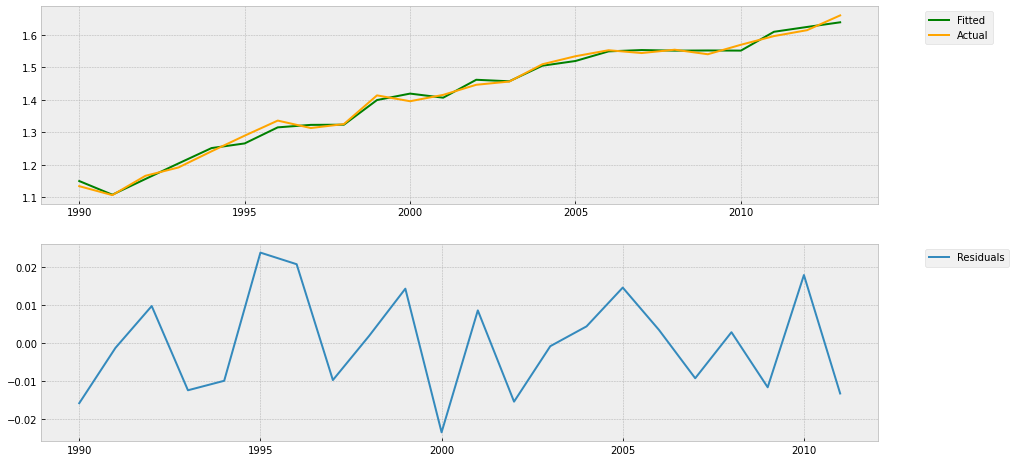

In [764]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,8))
plt.style.use('bmh')

ax1.plot(results.predict(fiji.loc['1990':'2013'][exog])
    , color='green', label='Fitted')
ax1.plot(fiji.loc['1990':'2013']['RGDP_FIJI_LOG'], color='orange', label='Actual')
ax1.legend(bbox_to_anchor=(1.05,1), loc='upper left')

ax2.plot(results.resid, label='Residuals')
# ax2.scatter(x=fiji.loc['1990':'2013'].index , y=results.resid, label='Residuals')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [765]:
res_tbl = pd.DataFrame(results.params, columns=['parameter'])
res_tbl['p-value'] = results.pvalues
res_tbl['significant'] = ['*' if i < 0.05 else '' for i in res_tbl['p-value']]
res_tbl

,parameter,p-value,significant
constant,-4.223783,0.000008,*
RGDP_AUS_LOG,1.447104,0.000109,*
SUGAROUTPUT_FIJI_LOG,0.082220,0.001937,*
recession,-0.020724,0.084621,
RGDP_FIJI_LAG_LOG,0.119597,0.378229,
RGDP_AUS_LAG_LOG,-0.761052,0.011348,*


In [766]:
results.resid[:5]

Date
1990   -0.015792
1991   -0.001225
1992    0.009780
1993   -0.012388
1994   -0.009891
dtype: float64

### Static Forecast (in-sample)

2011, 2012, 2013

In [767]:
predictions = results.predict(fiji.loc['2011':'2013'][exog])
predictions = np.exp(predictions)
predictions

Date
2011    4.998513
2012    5.073000
2013    5.146074
dtype: float64

### Dynamic Forecast (in-sample)

Use previous forecasted value for Fiji's RGDP to predict next value for RGDP

In [768]:
fiji_d = fiji.copy()

for i in np.arange(2011,2014):
    fiji_d.at[i, 'RGDP_FIJI'] = np.exp(results.predict(fiji_d.loc[1990:i][exog])).values[-1]
    fiji_d['RGDP_FIJI_LOG'] = np.log(fiji_d['RGDP_FIJI'])
    fiji_d['RGDP_FIJI_LAG_LOG'] = np.log(fiji_d['RGDP_FIJI'].shift(1))
    print(np.round(fiji_d.loc[2011:2013]['RGDP_FIJI'].values, 4))

[4.9985 5.0231 5.2563]
[4.9985 5.081  5.2563]
[4.9985 5.081  5.1531]


In [769]:
fiji_d.loc[2011:2013]['RGDP_FIJI']

Date
2011    4.998513
2012    5.081035
2013    5.153136
Name: RGDP_FIJI, dtype: float64